# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat_list = []
lng_list = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval")
print("------------------------------")

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0 
            set_counter = set_counter + 1 
        
        else:
            index_counter = index_counter + 1 
       
        print(f"Processing Record {index_counter} of set {set_counter} | {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping....")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of set 1 | hofn
Processing Record 2 of set 1 | touros
Processing Record 3 of set 1 | airai
Processing Record 4 of set 1 | ushuaia
Processing Record 5 of set 1 | punta arenas
Processing Record 6 of set 1 | yellowknife
Processing Record 7 of set 1 | iwaki
Processing Record 8 of set 1 | rikitea
Processing Record 9 of set 1 | shenjiamen
Processing Record 10 of set 1 | nanortalik
Processing Record 11 of set 1 | codrington
Processing Record 12 of set 1 | bluff
Processing Record 13 of set 1 | nshamba
Processing Record 14 of set 1 | castro
Processing Record 15 of set 1 | ribeira grande
Processing Record 16 of set 1 | saldanha
Processing Record 17 of set 1 | sept-iles
City not found. Skipping....
Processing Record 18 of set 1 | saint-louis
Processing Record 19 of set 1 | nemencine
Processing Record 20 of set 1 | bredasdorp
Processing Record 21 of set 1 | bambous virieux
Processing Record 22 of set 1 | bagdarin
Processin

Processing Record 37 of set 4 | hasaki
Processing Record 38 of set 4 | bethel
Processing Record 39 of set 4 | mayor pablo lagerenza
Processing Record 40 of set 4 | torbay
Processing Record 41 of set 4 | birjand
Processing Record 42 of set 4 | awbari
Processing Record 43 of set 4 | verkhnevilyuysk
Processing Record 44 of set 4 | sitka
City not found. Skipping....
Processing Record 45 of set 4 | eureka
Processing Record 46 of set 4 | panjab
Processing Record 47 of set 4 | gazli
Processing Record 48 of set 4 | chokurdakh
Processing Record 49 of set 4 | severomorsk
Processing Record 50 of set 4 | ballina
Processing Record 0 of set 5 | honningsvag
Processing Record 1 of set 5 | esperance
Processing Record 2 of set 5 | ngunguru
Processing Record 3 of set 5 | washington
Processing Record 4 of set 5 | carnarvon
Processing Record 5 of set 5 | bratsk
City not found. Skipping....
Processing Record 6 of set 5 | balsas
Processing Record 7 of set 5 | provideniya
Processing Record 8 of set 5 | vila f

Processing Record 20 of set 8 | saint anthony
Processing Record 21 of set 8 | ryde
Processing Record 22 of set 8 | itoman
Processing Record 23 of set 8 | long xuyen
Processing Record 24 of set 8 | machico
Processing Record 25 of set 8 | nagato
Processing Record 26 of set 8 | novo aripuana
City not found. Skipping....
Processing Record 27 of set 8 | roma
Processing Record 28 of set 8 | aldan
Processing Record 29 of set 8 | brasileia
Processing Record 30 of set 8 | mayo
City not found. Skipping....
Processing Record 31 of set 8 | zyryanka
Processing Record 32 of set 8 | henties bay
Processing Record 33 of set 8 | payakumbuh
Processing Record 34 of set 8 | acarau
Processing Record 35 of set 8 | beringovskiy
Processing Record 36 of set 8 | ayr
Processing Record 37 of set 8 | alice springs
Processing Record 38 of set 8 | nelson bay
Processing Record 39 of set 8 | samarai
Processing Record 40 of set 8 | yumen
Processing Record 41 of set 8 | talnakh
Processing Record 42 of set 8 | tazmalt
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    
    
    
})

weather_df.to_csv("city_data.csv")
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hofn,64.2539,-15.2082,40.69,76,100,10.04,IS,1666591275
1,Touros,-5.1989,-35.4608,77.23,81,12,10.87,BR,1666591281
2,Airai,-8.9266,125.4092,76.55,52,82,2.17,TL,1666591282
3,Ushuaia,-54.8000,-68.3000,34.68,94,84,3.85,AR,1666591282
4,Punta Arenas,-53.1500,-70.9167,42.12,81,35,5.68,CL,1666591283


In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,20.423386,22.053222,60.880410,71.106952,60.839572,8.334670,1.666592e+09
std,32.655249,90.585095,20.069187,21.941545,38.410693,6.195857,1.567776e+02
min,-54.800000,-179.166700,-6.000000,13.000000,0.000000,0.000000,1.666591e+09
25%,-6.216700,-60.771800,47.950000,59.000000,22.000000,3.490000,1.666591e+09
50%,24.187700,26.891000,64.040000,76.000000,75.000000,6.850000,1.666592e+09
75%,47.971400,105.416700,77.090000,89.000000,99.000000,11.500000,1.666592e+09
max,78.218600,179.316700,100.920000,100.000000,100.000000,35.520000,1.666592e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_df = weather_df.loc[weather_df['Humidity'] > 100]
if humidity_df.size < 1:
    print('There are no cities with humidity over 100')
else: humidity_df

There are no cities with humidity over 100


In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_df.index

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = pd.DataFrame(weather_df)

if humidity_df.size > 0:
    clean_city_df = weather_df.drop(humidity_df.index, axis=0, inplace=False)

clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hofn,64.2539,-15.2082,40.69,76,100,10.04,IS,1666591275
1,Touros,-5.1989,-35.4608,77.23,81,12,10.87,BR,1666591281
2,Airai,-8.9266,125.4092,76.55,52,82,2.17,TL,1666591282
3,Ushuaia,-54.8000,-68.3000,34.68,94,84,3.85,AR,1666591282
4,Punta Arenas,-53.1500,-70.9167,42.12,81,35,5.68,CL,1666591283


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

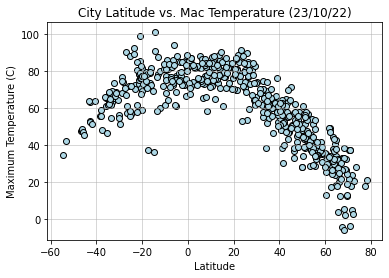

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Mac Temperature (23/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("Latitude versus Max Temp.png")

## Latitude vs. Humidity Plot

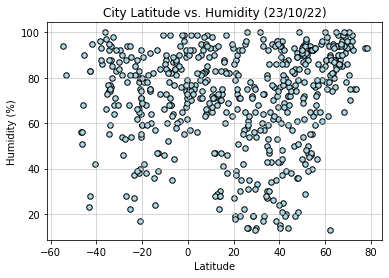

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor="lightblue", marker='o', s=30, edgecolor="black")
plt.title("City Latitude vs. Humidity (23/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("Latitude versus Humidity.png")

## Latitude vs. Cloudiness Plot

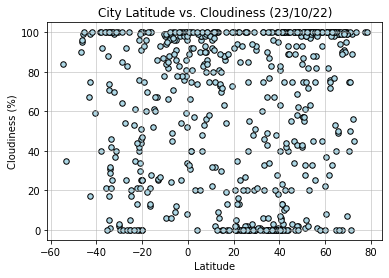

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker='o', s=30, facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (23/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("Latitude versus cloudiness.png")

## Latitude vs. Wind Speed Plot

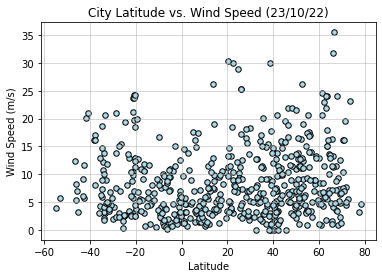

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker='o', s=30, facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (23/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("Latitude versus WindSpeed.png")

## Linear Regression

In [15]:
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

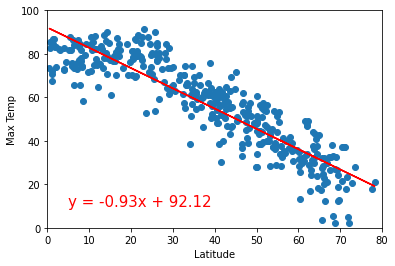

In [16]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.ylim(0,100)
plt.xlim(0,80)

plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("Northern Max Temp vs Lat Regression.png")

In [17]:
#The data here is showing that the lower the latitude is the higher the max temperature is.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

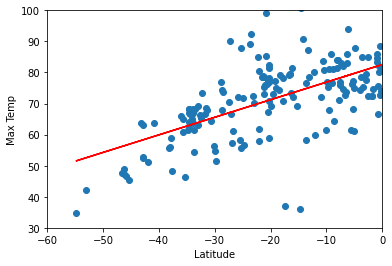

In [18]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylim(30,100)
plt.xlim(-60,0,10)

plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("South Max Temp vs Lat Regression.png")

In [19]:
#Here the data is showing us that higher the max temperatures are, the latitude will be higher from latitude -50 to 0. 

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

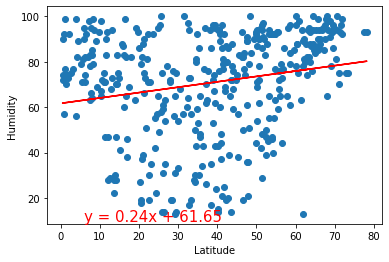

In [20]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("North Humidity vs Lat Regression.png")

In [21]:
#The data here is showing us that there is a small correlation in the humidity data from the North. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

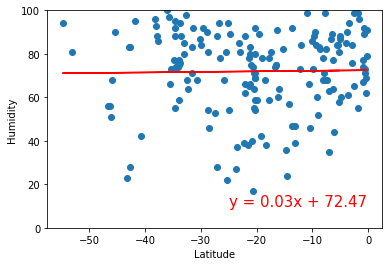

In [22]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylim(0,100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("South Humidity vs Lat Regression.png")

In [23]:
#The sourthern data model with linear regression is indicating a simular result as the norther model. 
#There is not much correlation how ever there is less scatter in the data.

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

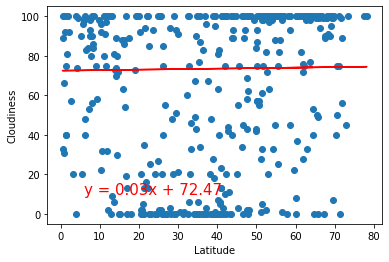

In [24]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("North Cloudiness vs Lat Regression.png")

In [25]:
#Here there is a vague showing of the linear regression and correlation, though there is a slight cloudiness decrease as
#the latitude gets higher.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

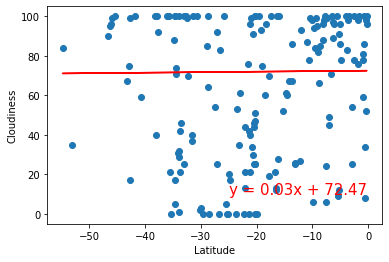

In [26]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("South Cloudiness vs Lat Regression.png")

In [27]:
#A simular result as the northern cloudiness model, a slight decrease in cloudiness. 

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

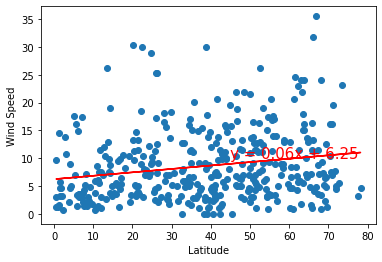

In [28]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("North Wind Speed vs Lat Regression.png")

In [29]:
#The data here is showing that there is a small rise in wind speed as the latitude is higher.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

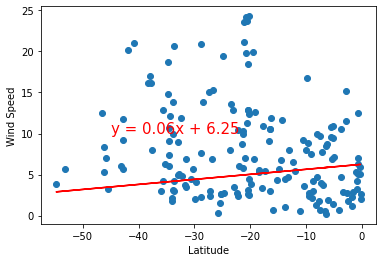

In [30]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(-45,10),fontsize=15,color="red")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("South Wind Speed vs Lat Regression.png")

In [31]:
#Very simular results for the southern wind speeds, there is slight gains in wind speed with higher latitudes.